## Hierarchial clustering of genomes vectorized using dna2vec embedding

Vectorisation of a genome as a normalized element-wise sum of trigrams of constituent embedding vectors

In [1]:
from fastai import basic_data
from dna2vec.multi_k_model import MultiKModel
import sys
sys.path.append("../mylib/")
from genomic import sequence 
from functools import partial
import pandas as pd
import numpy as np

In [2]:
FASTAS="/data/genomes/GenSeq_fastas/valid"
sequence.get_fasta_files(FASTAS)

[PosixPath('/data/genomes/GenSeq_fastas/valid/GCF_000005845.2_ASM584v2_genomic.fna'),
 PosixPath('/data/genomes/GenSeq_fastas/valid/GCF_000751775.1_A1A_genomic.fna'),
 PosixPath('/data/genomes/GenSeq_fastas/valid/GCF_000752395.1_Bacillus_andreraoultii_genomic.fna')]

In [3]:
data = sequence.Dna2VecList.from_folder("/data/genomes/GenSeq_fastas/valid",n_cpus=7,agg=partial(np.mean, axis=0))
files = data.items.copy()
sequence.GSFileProcessor().process(data)
tok = sequence.GSTokenizer(ngram=8, skip=180, n_cpus=7)
sequence.GSTokenizeProcessor(tokenizer=tok).process(data)
%time sequence.Dna2VecProcessor().process(data)

CPU times: user 19.3 s, sys: 293 ms, total: 19.5 s
Wall time: 19.5 s


In [4]:
emb=MultiKModel('~/.fastai/models/pretrained/dna2vec-20161219-0153-k3to8-100d-10c-29320Mbp-sliding-Xat.w2v')

In [9]:
type(emb.data[6].model[["AAAACG", "CCCCGA"]][0])

numpy.ndarray

In [10]:
type(np.asarray([[0.]*100,[0.]*100])[0])

numpy.ndarray

In [6]:
ids = [x['id'] for x in files]

In [7]:
ids

['NC_000913.3',
 'NZ_CCRF01000001.1',
 'NZ_CCRF01000002.1',
 'NZ_CCRF01000003.1',
 'NZ_CCRF01000004.1',
 'NZ_CCRF01000005.1',
 'NZ_CCRF01000006.1',
 'NZ_CCRF01000007.1',
 'NZ_CCRF01000008.1',
 'NZ_CCRF01000009.1',
 'NZ_CCRF01000010.1',
 'NZ_CCRF01000011.1',
 'NZ_CCRF01000012.1',
 'NZ_CCRF01000013.1',
 'NZ_CCRF01000014.1',
 'NZ_CCRF01000015.1',
 'NZ_CCRF01000016.1',
 'NZ_CCRF01000017.1',
 'NZ_CCRF01000018.1',
 'NZ_CCRF01000019.1',
 'NZ_CCRF01000020.1',
 'NZ_CCRF01000021.1',
 'NZ_CCRF01000022.1',
 'NZ_CCRF01000023.1',
 'NZ_CCRF01000024.1',
 'NZ_CCRF01000025.1',
 'NZ_CCRF01000026.1',
 'NZ_CCRF01000027.1',
 'NZ_CCRF01000028.1',
 'NZ_CCRF01000029.1',
 'NZ_CCRF01000030.1',
 'NZ_CCRF01000031.1',
 'NZ_CCRF01000032.1',
 'NZ_CCRF01000033.1',
 'NZ_CCRF01000034.1',
 'NZ_CCRF01000035.1',
 'NZ_CCRF01000036.1',
 'NZ_CCRF01000037.1',
 'NZ_CCRF01000038.1',
 'NZ_CCRF01000039.1',
 'NZ_CCRF01000040.1',
 'NZ_CCRF01000041.1',
 'NZ_CCRF01000042.1',
 'NZ_CCRF01000043.1',
 'NZ_CCRF01000044.1',
 'NZ_CCRF0100004

In [9]:
df=pd.DataFrame(data=np.asarray(data.items),index=ids)

In [12]:
df.iloc[100:120]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
NZ_CCRF01000100.1,-2.357970,13.234817,-1.706275,-7.992819,-5.118100,0.643502,-5.677807,5.477491,-2.093295,-3.393246,...,-7.920824,1.319195,-2.832875,-7.654461,3.296790,-1.115126,-3.788754,-4.371722,-5.413702,1.243805
NZ_CCRF01000101.1,-3.785244,37.507866,0.588965,-13.802622,-15.097116,11.974009,-26.343130,12.611039,-5.823318,-17.952919,...,-20.603115,0.393189,-16.301735,-14.882989,6.249262,-1.977975,-7.115139,-24.228359,-20.098518,-1.555974
NZ_CCRF01000102.1,-23.825651,118.221481,-3.581285,-32.563343,-26.205742,19.551279,-62.805855,29.379206,-22.188789,-49.038242,...,-65.172272,-14.197891,-54.028805,-51.536499,31.974407,0.976115,-49.021149,-64.904480,-57.577141,-7.967038
NZ_CCRF01000103.1,-2.899631,61.014011,-4.261966,-10.746480,-19.090908,5.220640,-29.497766,12.945676,-21.956480,-29.052534,...,-35.424267,-7.264508,-25.753651,-30.929317,11.833143,5.915764,-9.803027,-21.142405,-18.413160,8.138173
NZ_CCRF01000104.1,-0.077174,3.474494,-1.673527,-1.096186,1.011175,-0.751950,-1.726505,0.799838,-0.956761,-3.215139,...,-0.864079,0.372901,-1.571535,-1.502889,3.392419,0.306319,-0.673761,-2.091249,-2.686873,1.448308
NZ_CCRF01000105.1,3.875683,35.681423,-1.654027,-8.666591,-12.276717,8.995735,-12.411956,1.783208,-13.873581,-13.500531,...,-16.457556,4.406670,-16.548576,-18.900723,11.027619,4.600076,-12.079144,-18.272640,-11.221173,-7.590316
NZ_CCRF01000106.1,0.148091,1.492581,0.078030,1.243074,-0.249110,0.361539,-0.124380,0.355161,-1.830723,-0.747224,...,-1.962202,-0.987216,-2.656561,-1.213299,2.438319,0.356416,0.347794,0.075257,-1.770744,-0.338895
NZ_CCFJ01000001.1,-0.281853,0.412512,-0.362324,1.104584,-1.212116,-0.759726,-0.689397,0.386600,-0.221655,-1.138622,...,-1.250717,0.434935,-0.059808,-1.567503,0.671421,-0.874863,0.109855,-1.202538,-0.931905,0.683273
NZ_CCFJ01000002.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NZ_CCFJ01000003.1,-1.096047,0.224250,-0.196642,-0.658883,-0.184850,-0.807266,-0.918927,-0.569570,1.294005,-0.408126,...,-0.082602,-0.452937,-0.298362,-0.560362,0.477617,0.364464,-0.552137,-0.451693,0.051762,-0.019647


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

x=np.asarray(data.items)
bad_fastas = np.where(np.mean(x,axis=1) == 0.)[0]
X = np.delete(x, bad_fastas,0)

labelList=np.delete(np.asarray(ids), bad_fastas)

linked = linkage(X, 'single')

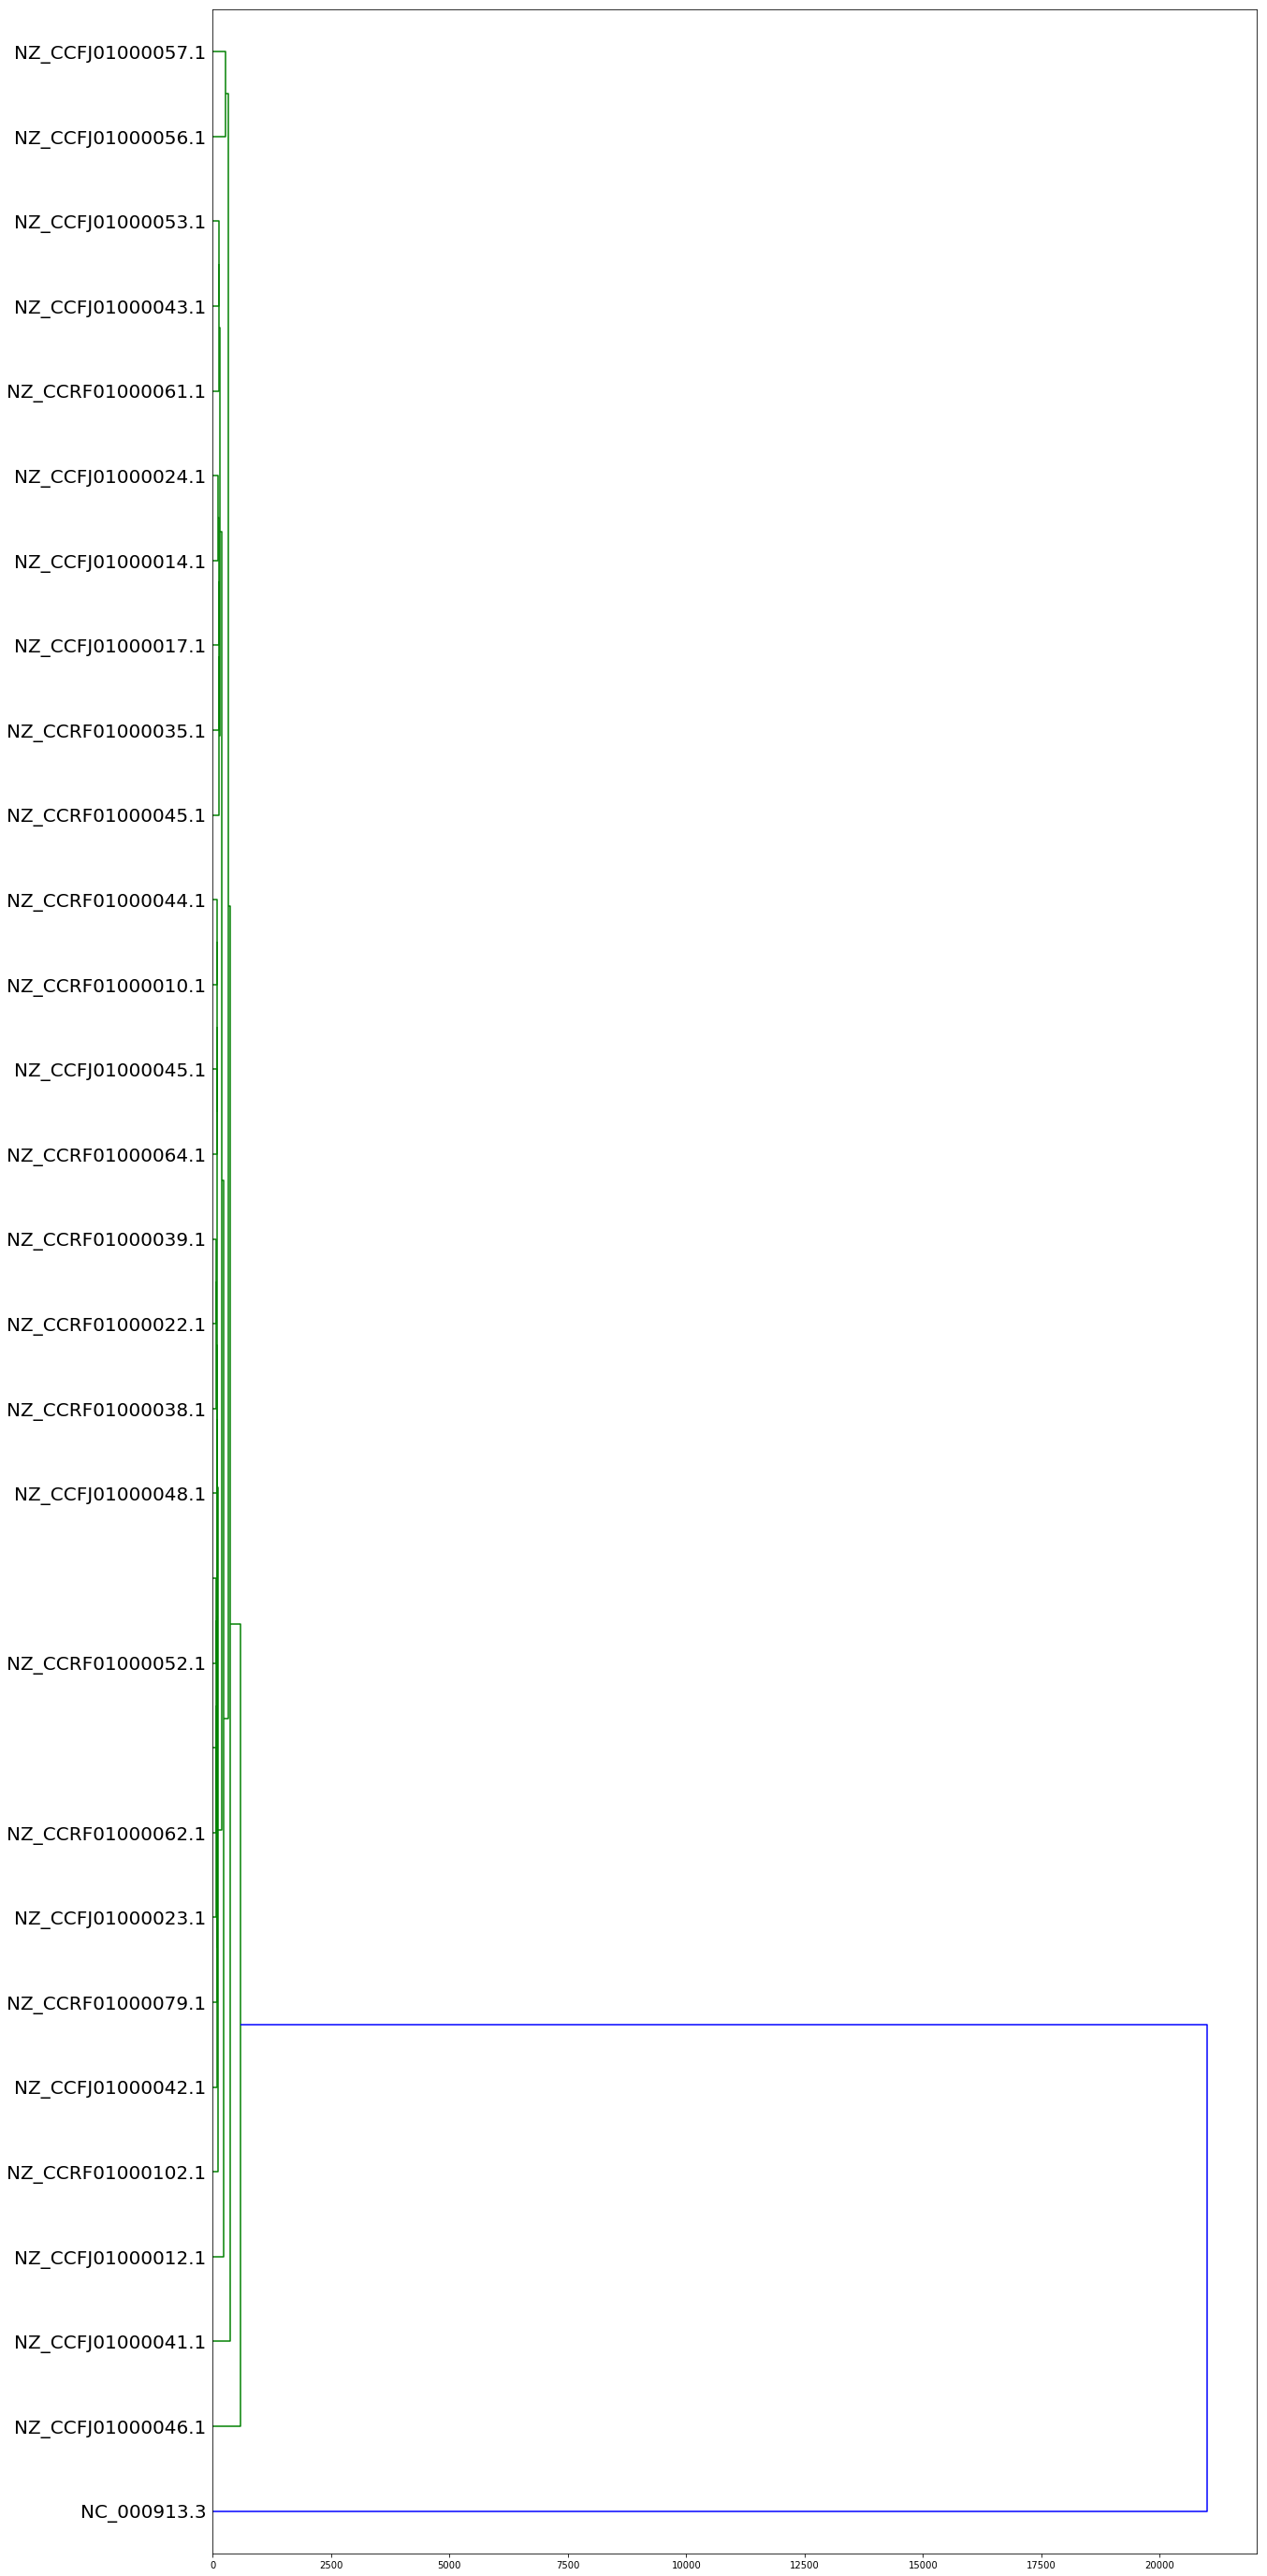

In [93]:
plt.figure(figsize=(20, 50))  
htree = dendrogram(linked,  
            orientation='right',
            p=30,
            truncate_mode='lastp',
            leaf_font_size = 20,
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False)
plt.show()  

In [88]:
htree['ivl'][20:22]

['NZ_CCRF01000098.1', 'NZ_CCRF01000101.1']

In [75]:
help(dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='b')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children.  The top of the U-link indicates a
    cluster merge.  The two legs of the U-link indicate which clusters
    were merged.  The length of the two legs of the U-link represents
    the distance between the child clusters.  It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
       

In [69]:
labelList.shape, X.shape

((164,), (164, 100))